In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600

import scipy

In [55]:
def autoRK(f, y0, h, A, B):
    """
    Generic explicit Runge-Kutta step.
    Works for scalar or vector-valued y0.
    Autonomous ODE: y' = f(y)
    """
    s = len(B)             # number of stages
    y0 = np.asarray(y0)    # ensures vector behavior works

    k = np.zeros((s,) + y0.shape)
    y_stage = np.zeros((s,) + y0.shape)

    for i in range(s):
        y_i = y0.copy()
        for j in range(i):
            y_i += h*A[i, j]*k[j]
        y_stage[i] = y_i

        k[i] = f(y_i)

    y1 = y0.copy()
    for i in range(s):
        y1 += h*B[i]*k[i]

    return y1

def butcher_autoRK(method):
    if method == 'heun2':
        A = np.array([
            [0, 0],
            [1, 0]
        ])
        B = np.array([1/2, 1/2])
    if method == 'ralston2':
        A = np.array([
            [0, 0],
            [2/3, 0]
        ])
        B = np.array([1/4, 3/4])
    if method == 'midpoint2':
        A = np.array([
            [0, 0],
            [1/2, 0]
        ])
        B = np.array([0, 1])
    
    if method == 'kutta3':
        A = np.array([
            [0, 0, 0],
            [1/2, 0, 0],
            [-1, 2, 0]
        ])
        B = np.array([1/6, 2/3, 1/6])
    if method == 'heun3':
        A = np.array([
            [0, 0, 0],
            [1/3, 0, 0],
            [0, 2/3, 0]
        ])
        B = np.array([1/4, 0, 3/4])

    if method == 'classic4':
        A = np.array([
            [0, 0, 0, 0],
            [1/3, 0, 0, 0],
            [-1/3, 1, 0, 0],
            [1, -1, 1, 0]
        ])
        B = np.array([1/8, 3/8, 3/8, 1/8])

    return A, B

def SECANT(f, x0, x1, eps):
    x2 = x0
    while np.abs(f(x2)) > eps :
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x2
    return x2

def SYSTEM_PRIME(SYSTEM):
    # the SYSTEM variable will be comprised of [F, F', F'']
    # SYSTEM_PRIME will be [F', F'', F''']

    SYSTEM_PRIME = np.array([
        SYSTEM[1],
        SYSTEM[2],
        m*(SYSTEM[1]**2 - 1) - (m+1)/2 * SYSTEM[0] * SYSTEM[2]
    ])
    
    return SYSTEM_PRIME

def INTEGRATE(Fpp0, eta_max, deta):
    SOLUTION = np.empty(shape = (int(eta_max/deta + 1), 3))

    SYSTEM = np.array([0.0, 0.0, Fpp0])
    for i in range(0, int(eta_max/deta + 1)):
        SOLUTION[i] = SYSTEM
        SYSTEM = autoRK(SYSTEM_PRIME, SYSTEM, deta, A, B)
    
    return SOLUTION

A, B = butcher_autoRK('classic4')

eta_max = 100
deta = 0.001
eta = np.linspace(0, eta_max, int(eta_max/deta + 1))

m_list = [-0.09041, -0.08257, -0.06542, 0.0, 1/9, 1/3, 1.0, 5.0]

# these bounds were found by testing manually
# and checking how F' sloped as eta → infinity
Fpp0_bounds = [ 
    [-0.1, +0.1], # m = -0.09041
    [0.05, 0.1], # m = -0.08257
    [0.1, 0.35], # m = -0.06542
    [0.25, 0.45], # m = 0.0
    [0.45, 0.6], # m = 1/9
    [0.758, 0.759], # m = 1/3
    [1.2325, 1.2326], # m = 1.0
    [2.6852799, 2.6852800] # m = 5.0
]

FALKNER_SKAN = np.empty(shape = (8, int(eta_max/deta + 1), 3))

for n in range(0, len(m_list)):
    m = m_list[n]
    Fpp0 = SECANT(lambda Fpp0: INTEGRATE(Fpp0, eta_max = eta_max, deta = deta)[-1][1] - 1, Fpp0_bounds[n][0], Fpp0_bounds[n][1], 1e-9)

    SOLUTION = INTEGRATE(Fpp0, eta_max = eta_max, deta = deta)
    FALKNER_SKAN[n] = SOLUTION

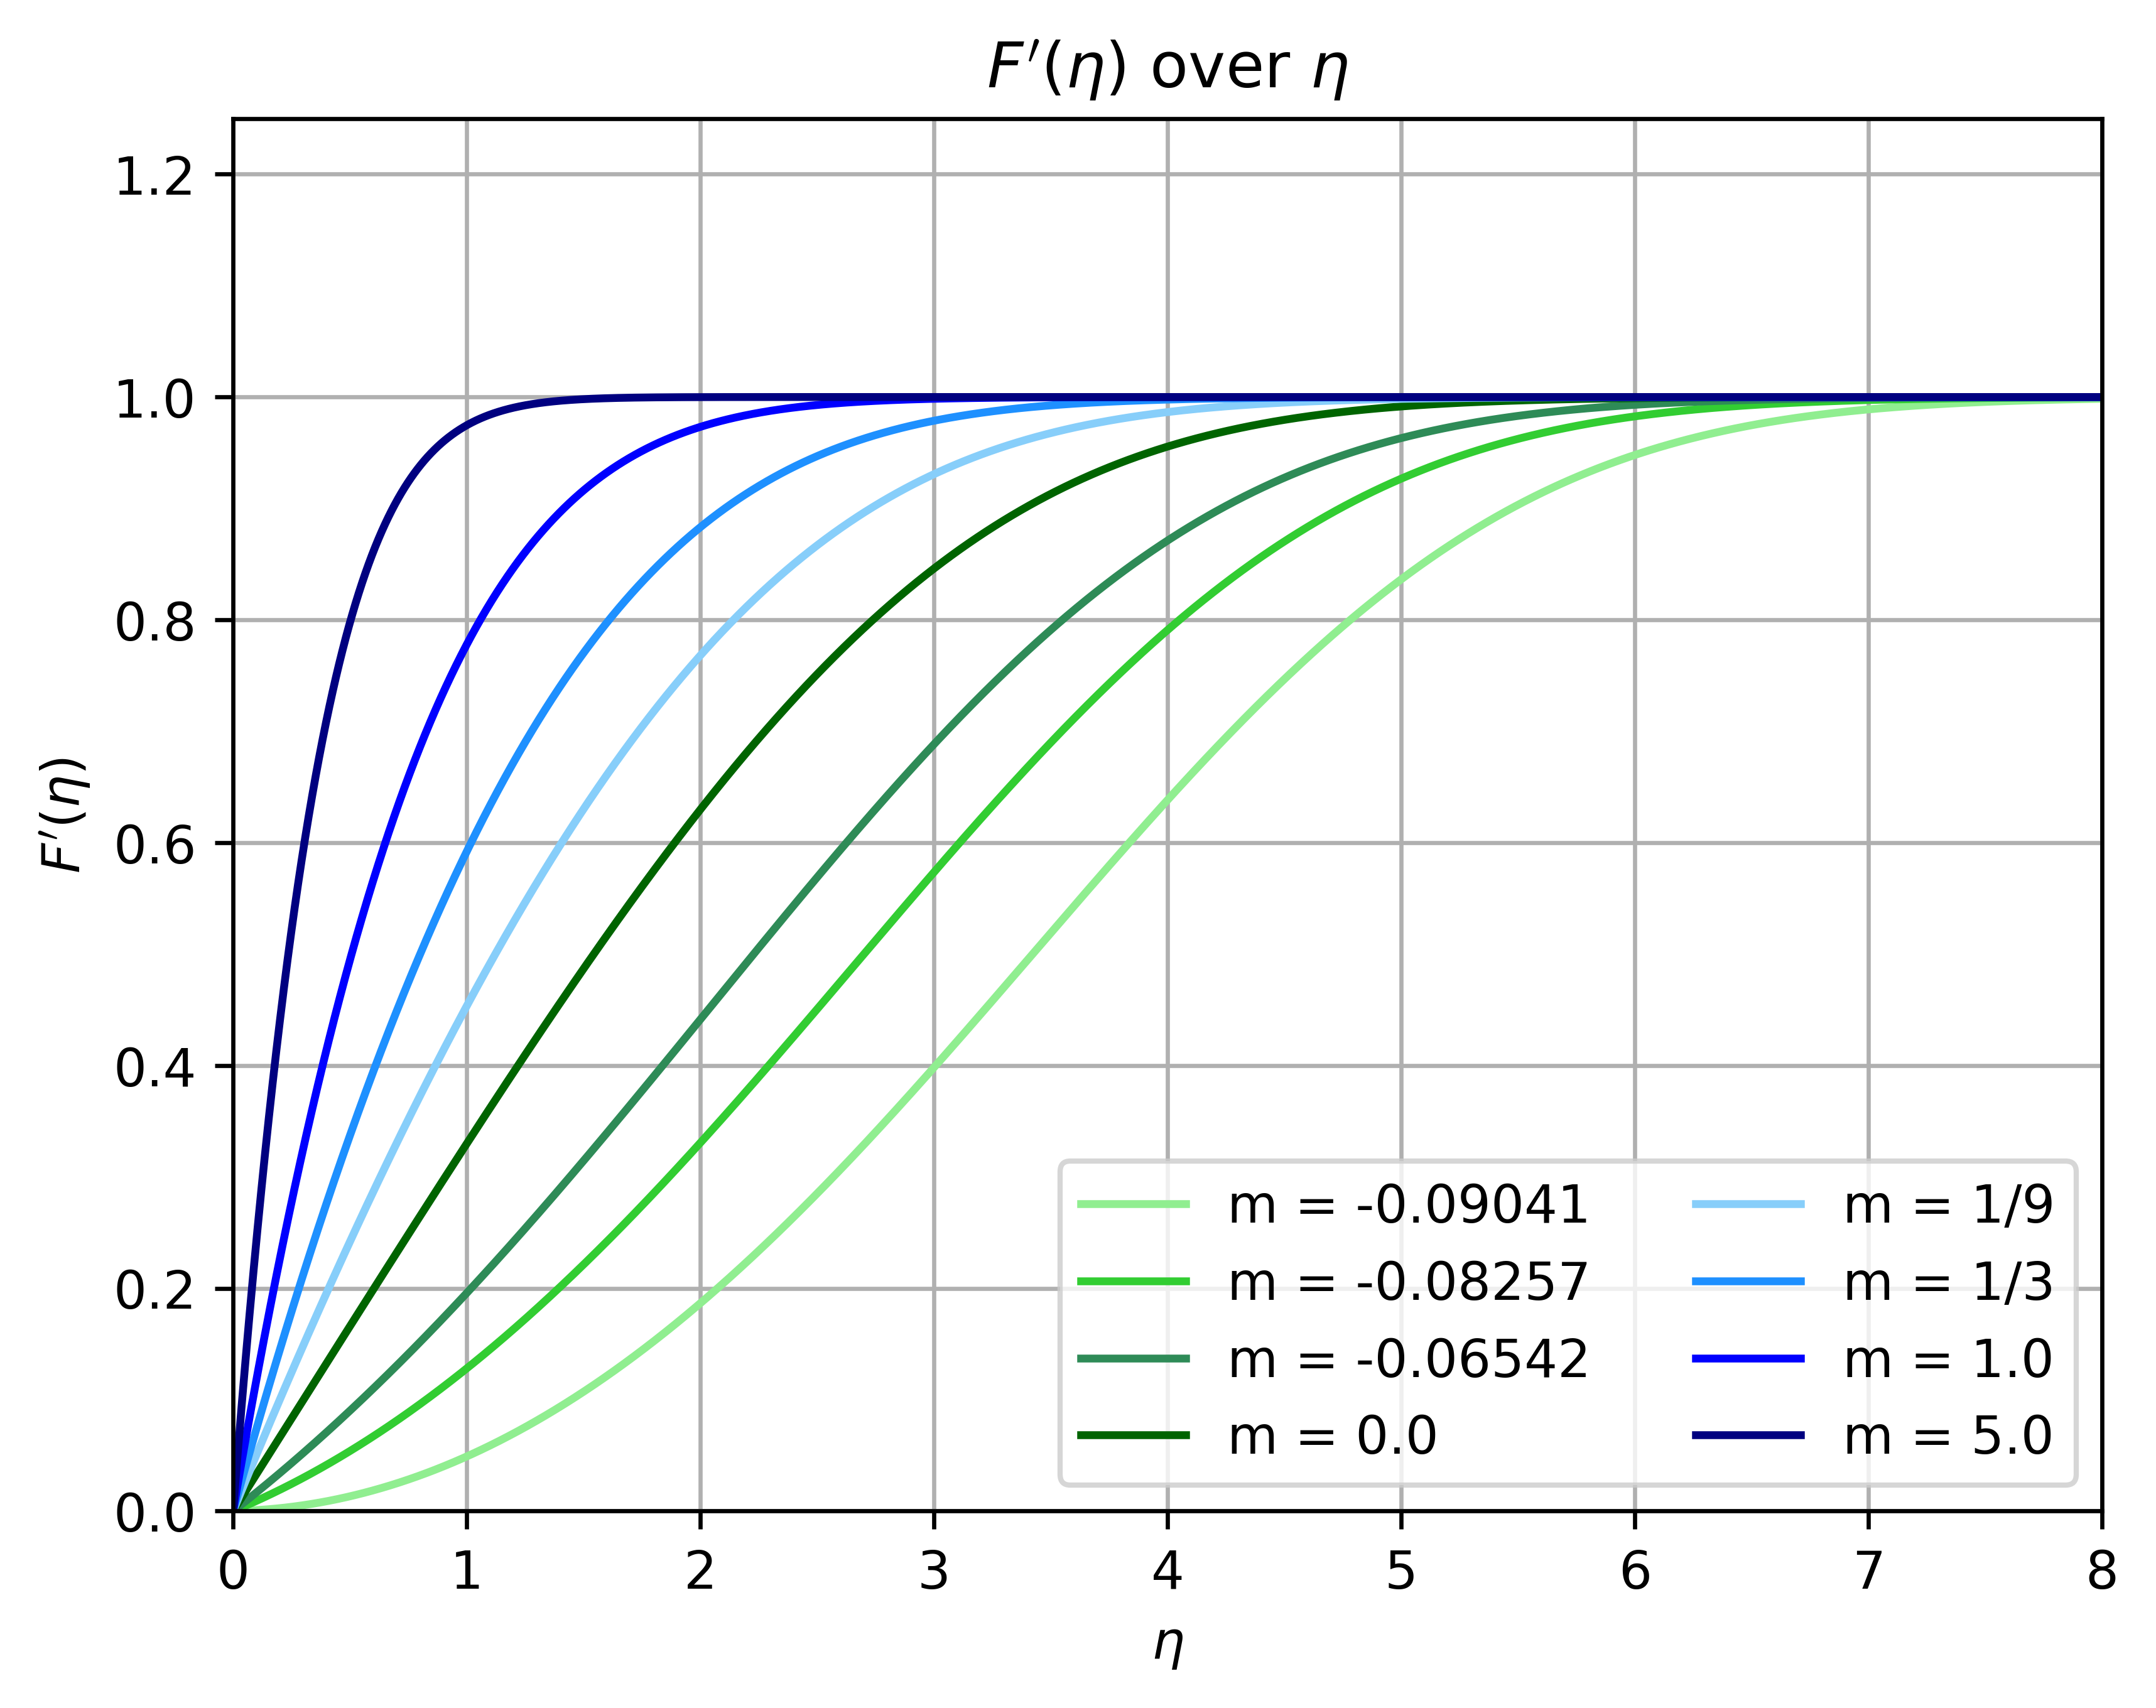

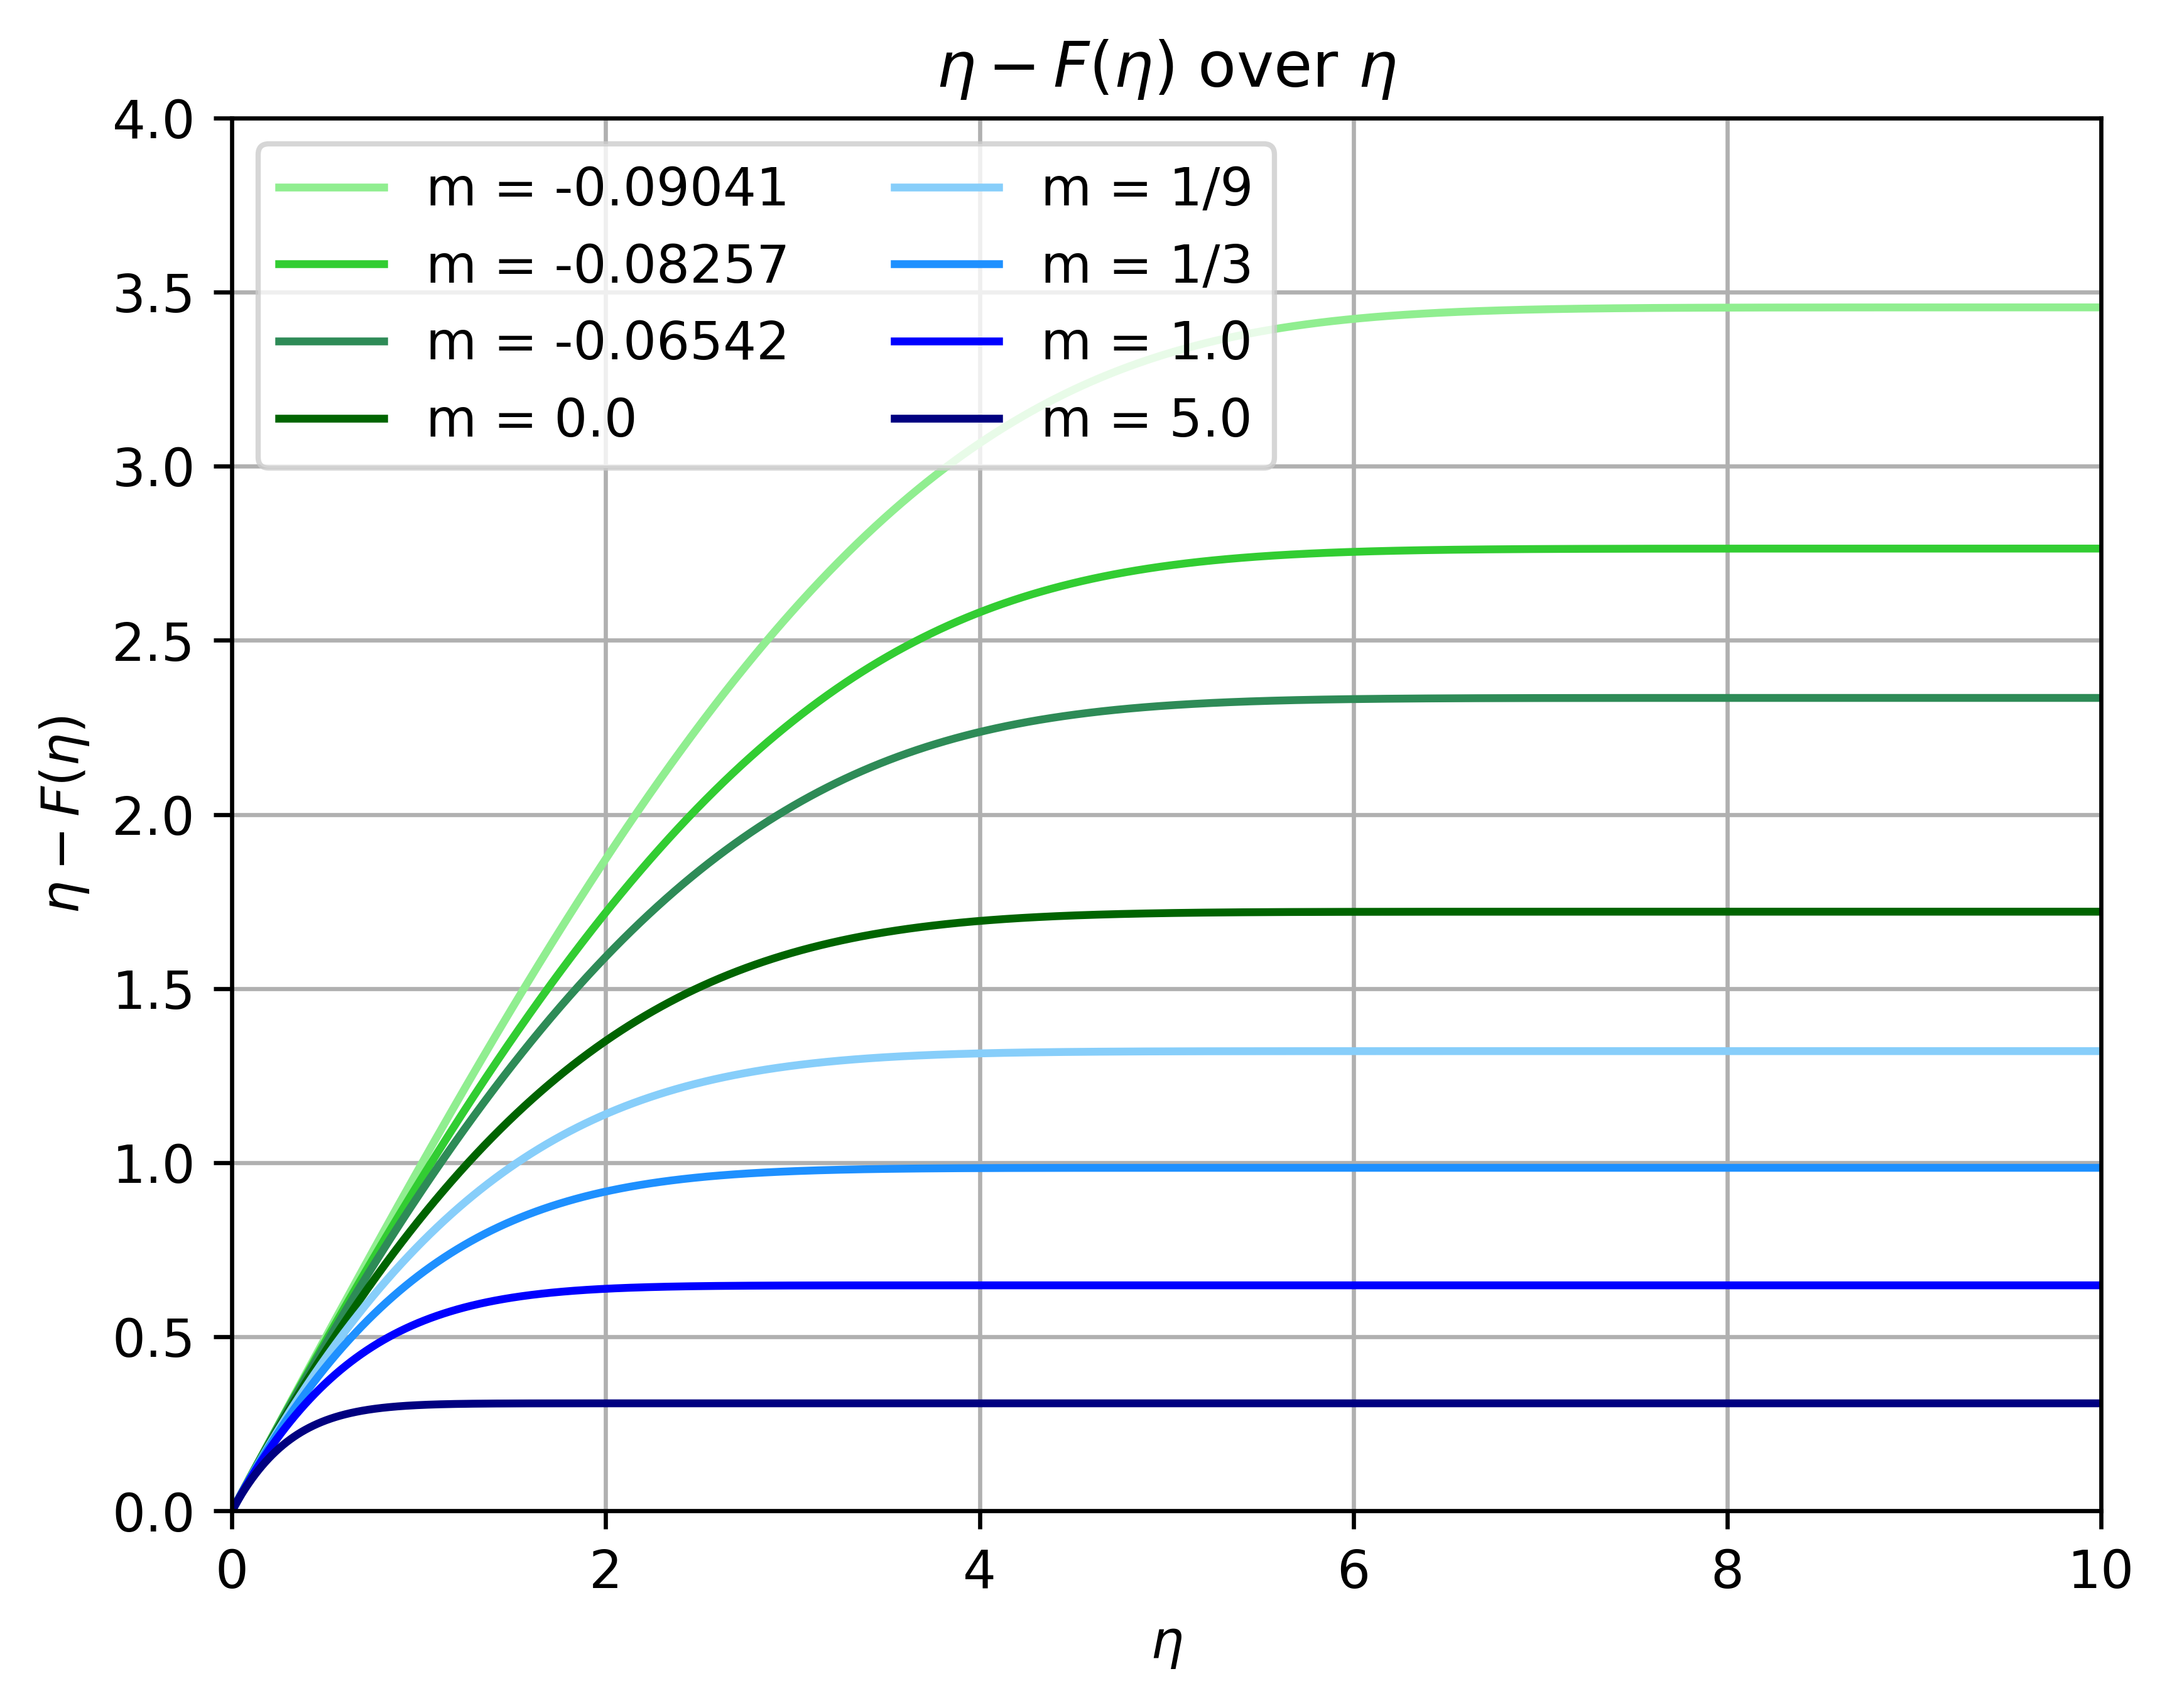

delta_1 = 3.45598
delta_1 = 2.76339
delta_1 = 2.33459
delta_1 = 1.72079
delta_1 = 1.32039
delta_1 = 0.98537
delta_1 = 0.64790
delta_1 = 0.30908

delta_2 = 0.86802
delta_2 = 0.83821
delta_2 = 0.78784
delta_2 = 0.66411
delta_2 = 0.54770
delta_2 = 0.42899
delta_2 = 0.29234
delta_2 = 0.14249


In [59]:
labels = ['m = -0.09041', 'm = -0.08257', 'm = -0.06542', 'm = 0.0', 'm = 1/9', 'm = 1/3', 'm = 1.0', 'm = 5.0']
colors = ['lightgreen', 'limegreen', 'seagreen', 'darkgreen', 'lightskyblue', 'dodgerblue', 'blue', 'navy']

for n in range(0, len(m_list)): plt.plot(eta, FALKNER_SKAN[n, :, 1], color = colors[n], label = labels[n])
plt.gca().set(xlim = (0, 8), ylim = (0, 1.25), title = r"$F'(\eta)$ over $\eta$", xlabel = r'$\eta$', ylabel = r"$F'(\eta)$")
plt.legend(ncol = 2, loc = 'lower right')
plt.grid()
plt.show()

for n in range(0, len(m_list)): plt.plot(eta, eta - FALKNER_SKAN[n, :, 0], color = colors[n], label = labels[n])
plt.gca().set(xlim = (0, 10), ylim = (0, 4), title = r"$\eta - F(\eta)$ over $\eta$", xlabel = r'$\eta$', ylabel = r"$\eta - F(\eta)$")
plt.legend(ncol = 2, loc = 'upper left')
plt.grid()
plt.show()

for n in range(0, len(m_list)):
    print("delta_1 = {0:.5f}".format(eta[-1] - FALKNER_SKAN[n, -1, 0]))

print()
for n in range(0, len(m_list)):
    print("delta_2 = {0:.5f}".format(2*(FALKNER_SKAN[n, 0, 2] - m_list[n]*(eta[-1] - FALKNER_SKAN[n, -1, 0])) / (3*m_list[n] + 1)))

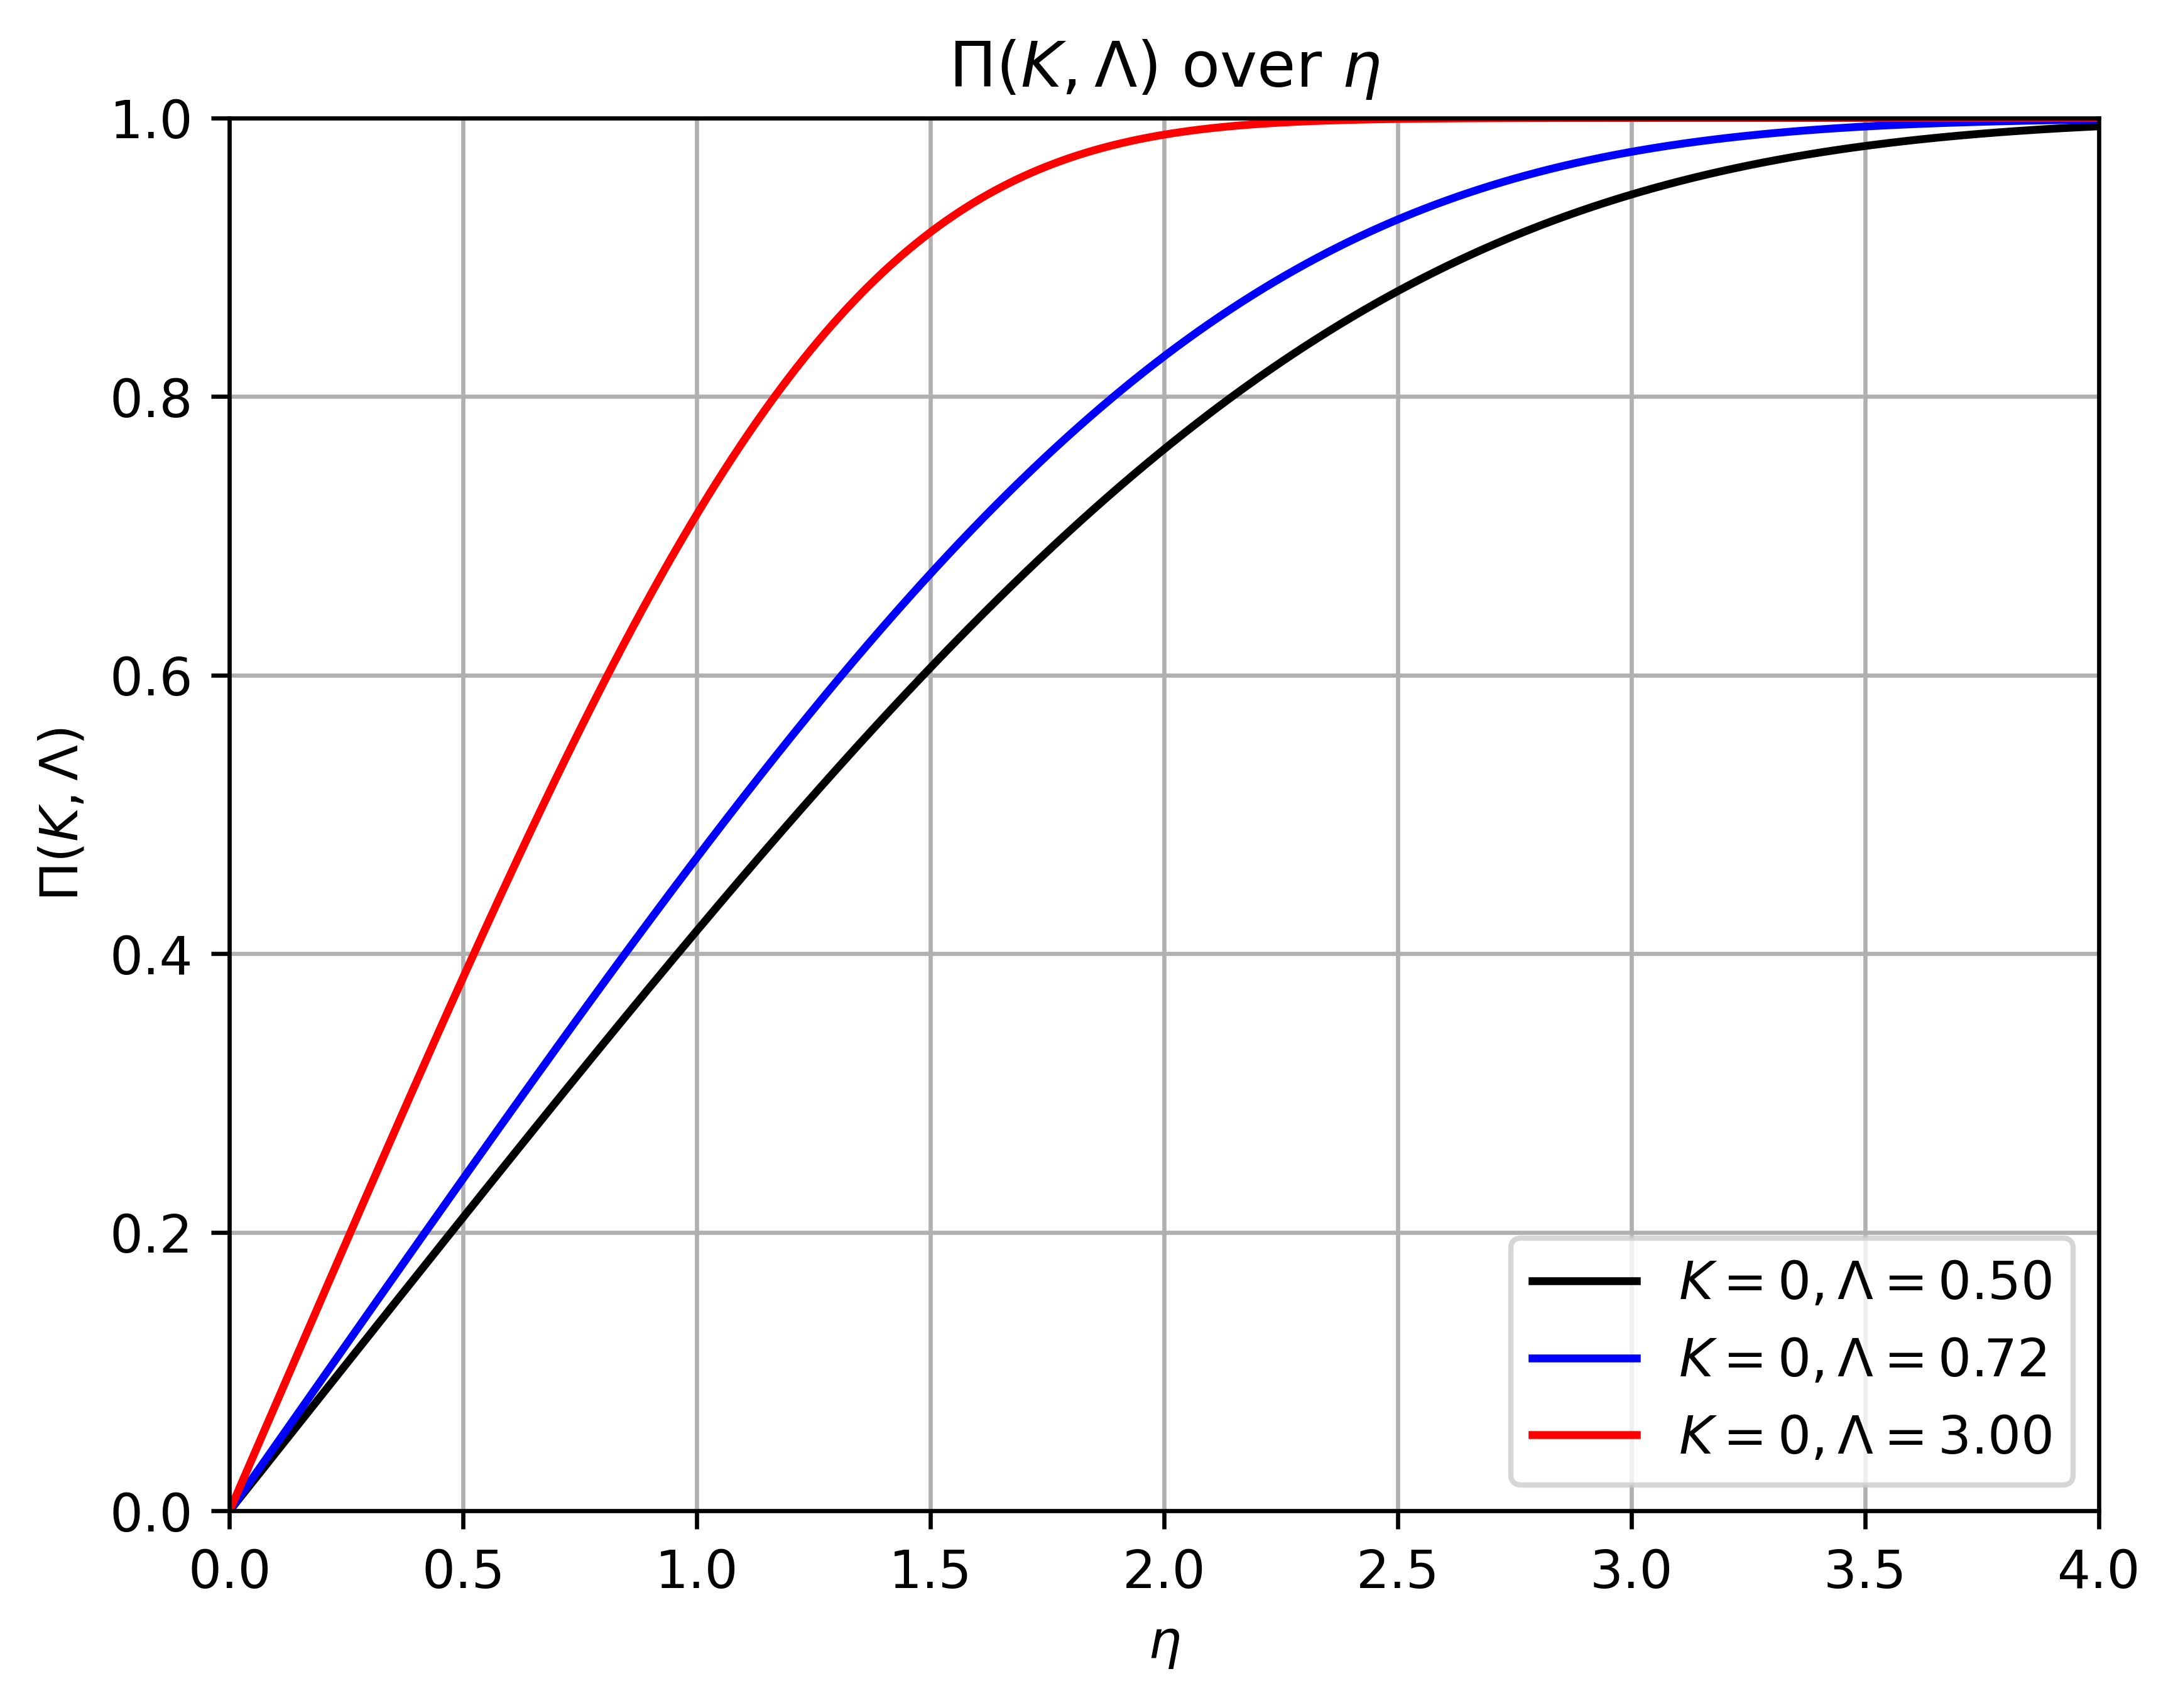

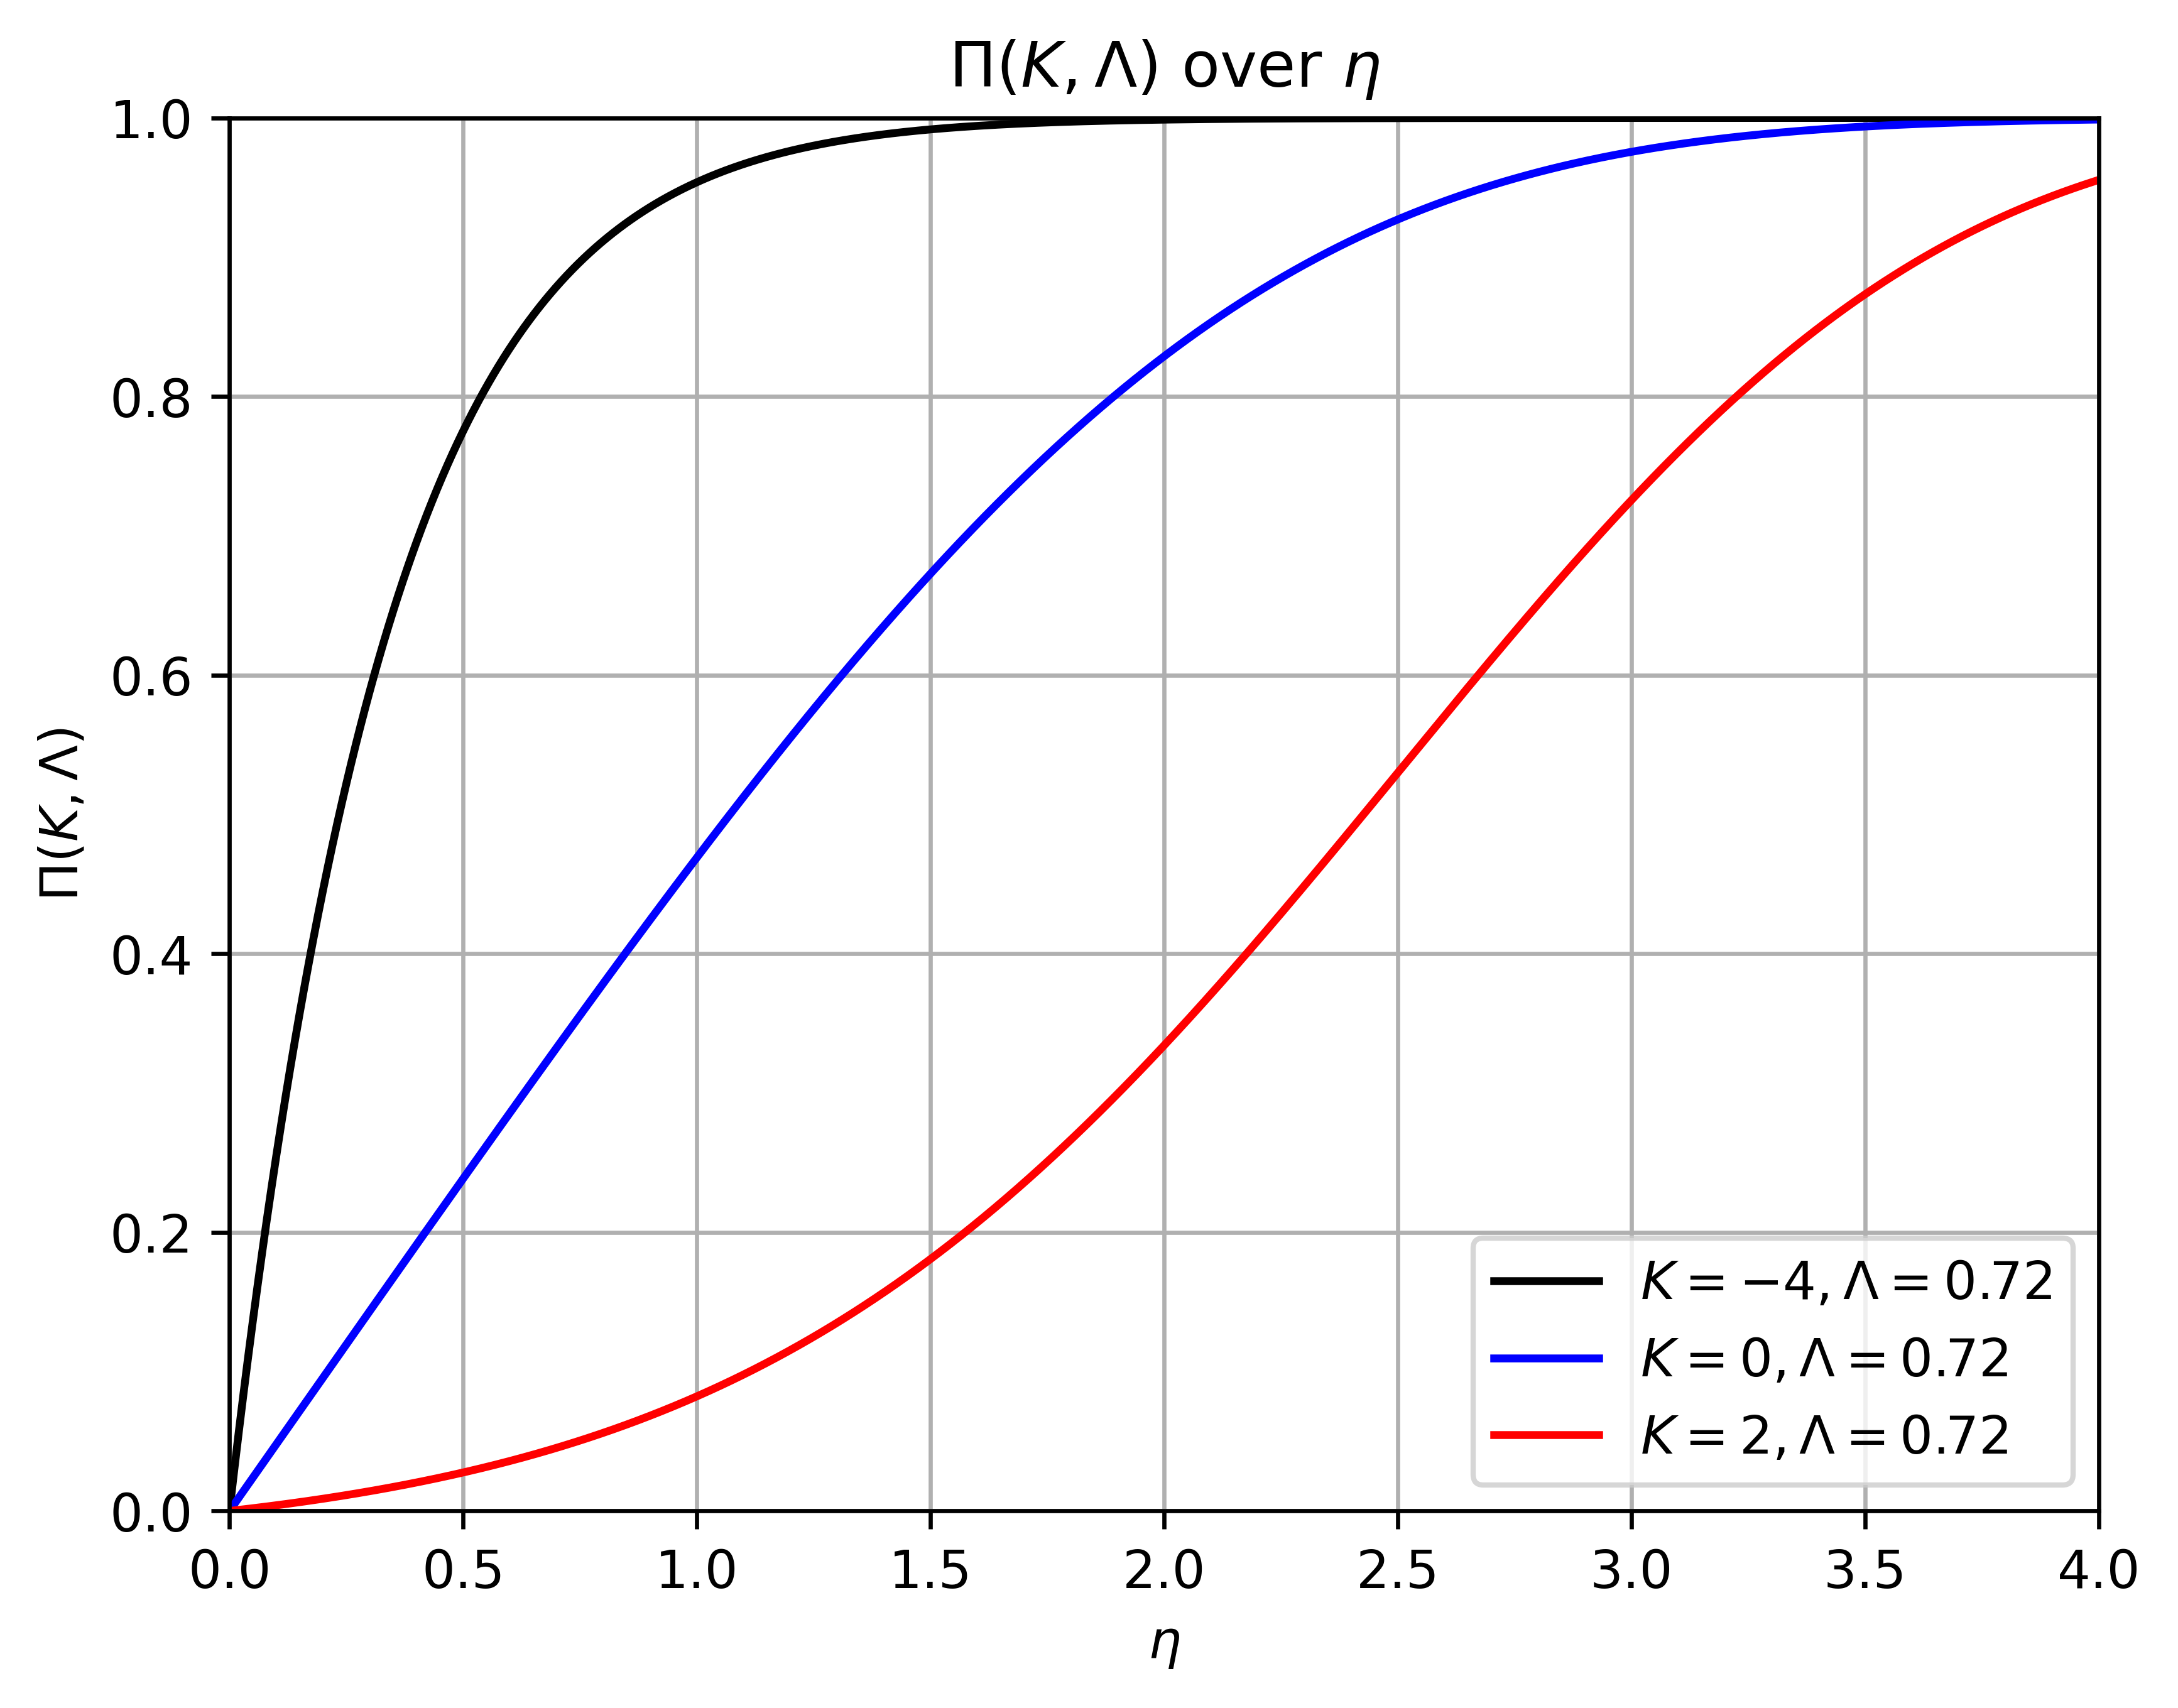

In [62]:
FLAT = FALKNER_SKAN[3]

def Pi(eta, K, LAMBDA):
    def g(eta, K, LAMBDA):
        f = -K + 2*FLAT[:, 0]
        integral = scipy.integrate.cumulative_trapezoid(f, eta, initial = 0)
        return np.exp(- LAMBDA * integral)
    
    g = g(eta, K, LAMBDA)

    top = scipy.integrate.cumulative_trapezoid(g, eta, initial = 0)
    bottom = top[-1]

    return top/bottom

plt.plot(eta, Pi(eta, K = 0, LAMBDA = 0.50), color = 'black', label = r"$K = 0, \Lambda = 0.50$")
plt.plot(eta, Pi(eta, K = 0, LAMBDA = 0.72), color = 'blue', label = r"$K = 0, \Lambda = 0.72$")
plt.plot(eta, Pi(eta, K = 0, LAMBDA = 3.00), color = 'red', label = r"$K = 0, \Lambda = 3.00$")
plt.gca().set(xlim = (0, 4.0), ylim = (0, 1), xlabel = r"$\eta$", ylabel = r"$\Pi(K, \Lambda)$", title = r"$\Pi(K, \Lambda)$ over $\eta$")
plt.legend()
plt.grid()
plt.show()

plt.plot(eta, Pi(eta, K = -4, LAMBDA = 0.72), color = 'black', label = r"$K = -4, \Lambda = 0.72$")
plt.plot(eta, Pi(eta, K = 0, LAMBDA = 0.72), color = 'blue', label = r"$K = 0, \Lambda = 0.72$")
plt.plot(eta, Pi(eta, K = 2, LAMBDA = 0.72), color = 'red', label = r"$K = 2, \Lambda = 0.72$")
plt.gca().set(xlim = (0, 4.0), ylim = (0, 1), xlabel = r"$\eta$", ylabel = r"$\Pi(K, \Lambda)$", title = r"$\Pi(K, \Lambda)$ over $\eta$")
plt.legend()
plt.grid()
plt.show()